# EDA датасета
В этом датасете собраны показатели воды по содержанию химических элементов в нем и целевая переменная - безопасна ли вода для употребления. Значение безопасности воды зависит от каждого параметра независимо друг от друга и вода может быть опасна при превышении нормы одного параметра, даже если остальные в порядке.
## Импорт библиотек и просмотр датасета

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [14]:
raw_data = pd.read_csv(f"https://drive.google.com/uc?id={'1HXu3s_EKOPQ2Yk_FeNyw8PsIu3mWr8Te'}")
raw_data.head(5)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


## Приведение типов

In [15]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

проблемными являются ammonia и is_safe. Заменим тип объекта на float

In [16]:
### Функции для перобразования str в float
def clean_features (x):
    try:
        return float(x)
    except ValueError:
        return np.nan

def clean_y(x):
    if x == '#NUM!':
        return np.nan
    try:
        return float(x)
    except:
        return np.nan
    
    
raw_data['ammonia'] = np.vectorize(clean_features)(raw_data['ammonia'])
raw_data['is_safe'] = np.vectorize(clean_y)(raw_data['is_safe'])

# Преобразование целевой переменной в категориальную переменную
raw_data['is_safe'] = raw_data['is_safe'].astype('category')

# Конвертация значений фичей в удобный вид. Приведённый к нужным типам данных датасет называется data
df = raw_data.convert_dtypes()

## Проверка наличия Nan

In [17]:
# Проверка наличия Nan
col = list(df.columns)
dic = {}
j = 1

for i in col:
  # Создание списка для проверки есть ли Nan в столбце
  isnull_list = list(df[i].isnull().unique())

  # если в списке True (Nan значения) и False (не Nan значения)
  if len(isnull_list) == 2:

    # Подсчет процента Nan от общего числа строк и округление до 1 знака
    proc_nan = np.round(len(df[df[i].isnull() == True]) / len(df[i]) * 100, 1)
    print(f'{j}. Колонка {i} на {proc_nan}% состоит из Nan')

  else:
    if isnull_list[0] == False:
      print(f'{j}. Колонка {i} просто СУПЕР, вообще нет Nan')

    else:
      print(f'{j}. Колонка {i} полный ОТСТОЙ, тут только Nan')

  j += 1

1. Колонка aluminium просто СУПЕР, вообще нет Nan
2. Колонка ammonia на 0.0% состоит из Nan
3. Колонка arsenic просто СУПЕР, вообще нет Nan
4. Колонка barium просто СУПЕР, вообще нет Nan
5. Колонка cadmium просто СУПЕР, вообще нет Nan
6. Колонка chloramine просто СУПЕР, вообще нет Nan
7. Колонка chromium просто СУПЕР, вообще нет Nan
8. Колонка copper просто СУПЕР, вообще нет Nan
9. Колонка flouride просто СУПЕР, вообще нет Nan
10. Колонка bacteria просто СУПЕР, вообще нет Nan
11. Колонка viruses просто СУПЕР, вообще нет Nan
12. Колонка lead просто СУПЕР, вообще нет Nan
13. Колонка nitrates просто СУПЕР, вообще нет Nan
14. Колонка nitrites просто СУПЕР, вообще нет Nan
15. Колонка mercury просто СУПЕР, вообще нет Nan
16. Колонка perchlorate просто СУПЕР, вообще нет Nan
17. Колонка radium просто СУПЕР, вообще нет Nan
18. Колонка selenium просто СУПЕР, вообще нет Nan
19. Колонка silver просто СУПЕР, вообще нет Nan
20. Колонка uranium просто СУПЕР, вообще нет Nan
21. Колонка is_safe на 0.0%

После наших преобразований типов появидись Nan, так как их меньше 0,1% спокойно удаляем и радуемся жизни 

In [18]:
print(f'Количество строк до удаления Nan {len(df)}')
df = df.dropna(how='any')
print(f'Количество строк после удаления Nan {len(df)}')

Количество строк до удаления Nan 7999
Количество строк после удаления Nan 7996


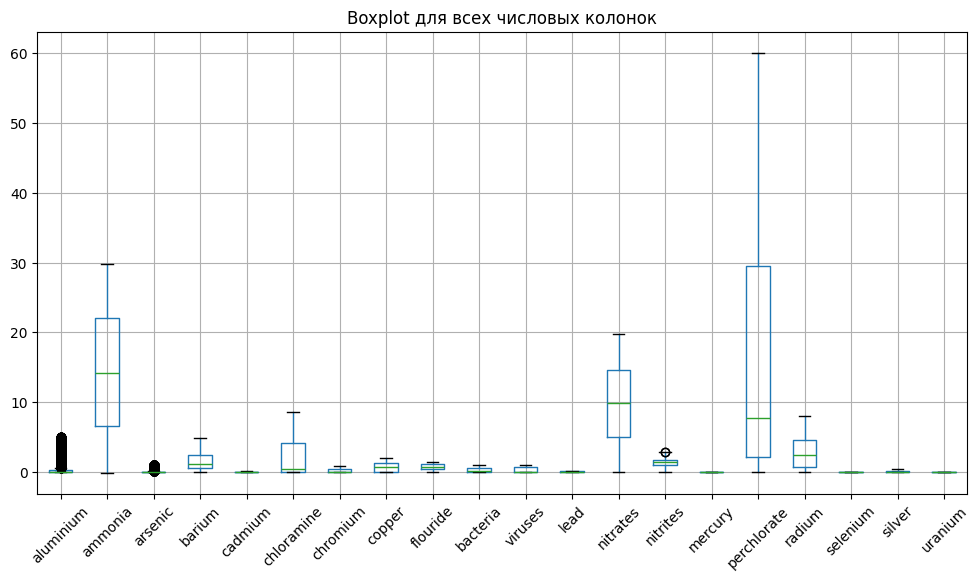

       aluminium    ammonia   arsenic    barium   cadmium  chloramine  \
count     7996.0     7996.0    7996.0    7996.0    7996.0      7996.0   
mean    0.666396  14.278212  0.161477  1.567928  0.042803    2.177589   
std     1.265323    8.87893  0.252632  1.216227  0.036049     2.56721   
min          0.0      -0.08       0.0       0.0       0.0         0.0   
25%         0.04     6.5775      0.03      0.56     0.008         0.1   
50%         0.07      14.13      0.05      1.19      0.04        0.53   
75%         0.28    22.1325       0.1    2.4825      0.07        4.24   
max         5.05      29.84      1.05      4.94      0.13        8.68   

       chromium    copper  flouride  bacteria   viruses      lead  nitrates  \
count    7996.0    7996.0    7996.0    7996.0    7996.0    7996.0    7996.0   
mean     0.2473   0.80594  0.771646  0.319714  0.328706  0.099431   9.81925   
std    0.270663  0.653595  0.435423  0.329497  0.378113  0.058169  5.541977   
min         0.0       0.0 

In [19]:
# Выбираем только числовые колонки
numeric_columns = df.select_dtypes(include=['number']).columns

# Boxplot для всех числовых колонок
plt.figure(figsize=(12, 6))
df[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot для всех числовых колонок')
plt.show()

print(df.describe())

# Проверка на аномальные значения
def check_anomalies(df):
    anomalies = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        anomalies[column] = len(outliers)
    
    return anomalies
#
anomalies = check_anomalies(df)
for col, count in anomalies.items():
    if count > 0:
        print(f"{col}: {count} аномалий ({count/len(df)*100:.2f}%)")

Мы видим приличное количество выбросов, но удалять я их не буду в силу природы данных. Выбросы здесь — не ошибки измерений, а реальные опасные уровни загрязнения, которые как раз и определяют, безопасна ли вода и если удалить такие значения, я потеряю важные паттерны, связанные с опасной водой. Так же, как я писал в README целевая переменная is_safe вычисляется по пороговым значениям для каждого показателя, а значит если хотя бы один показатель превышает свой порог — вода считается небезопасной. По этим причинам я оставлю выбросы.

# Визуализация распределений и выбросов

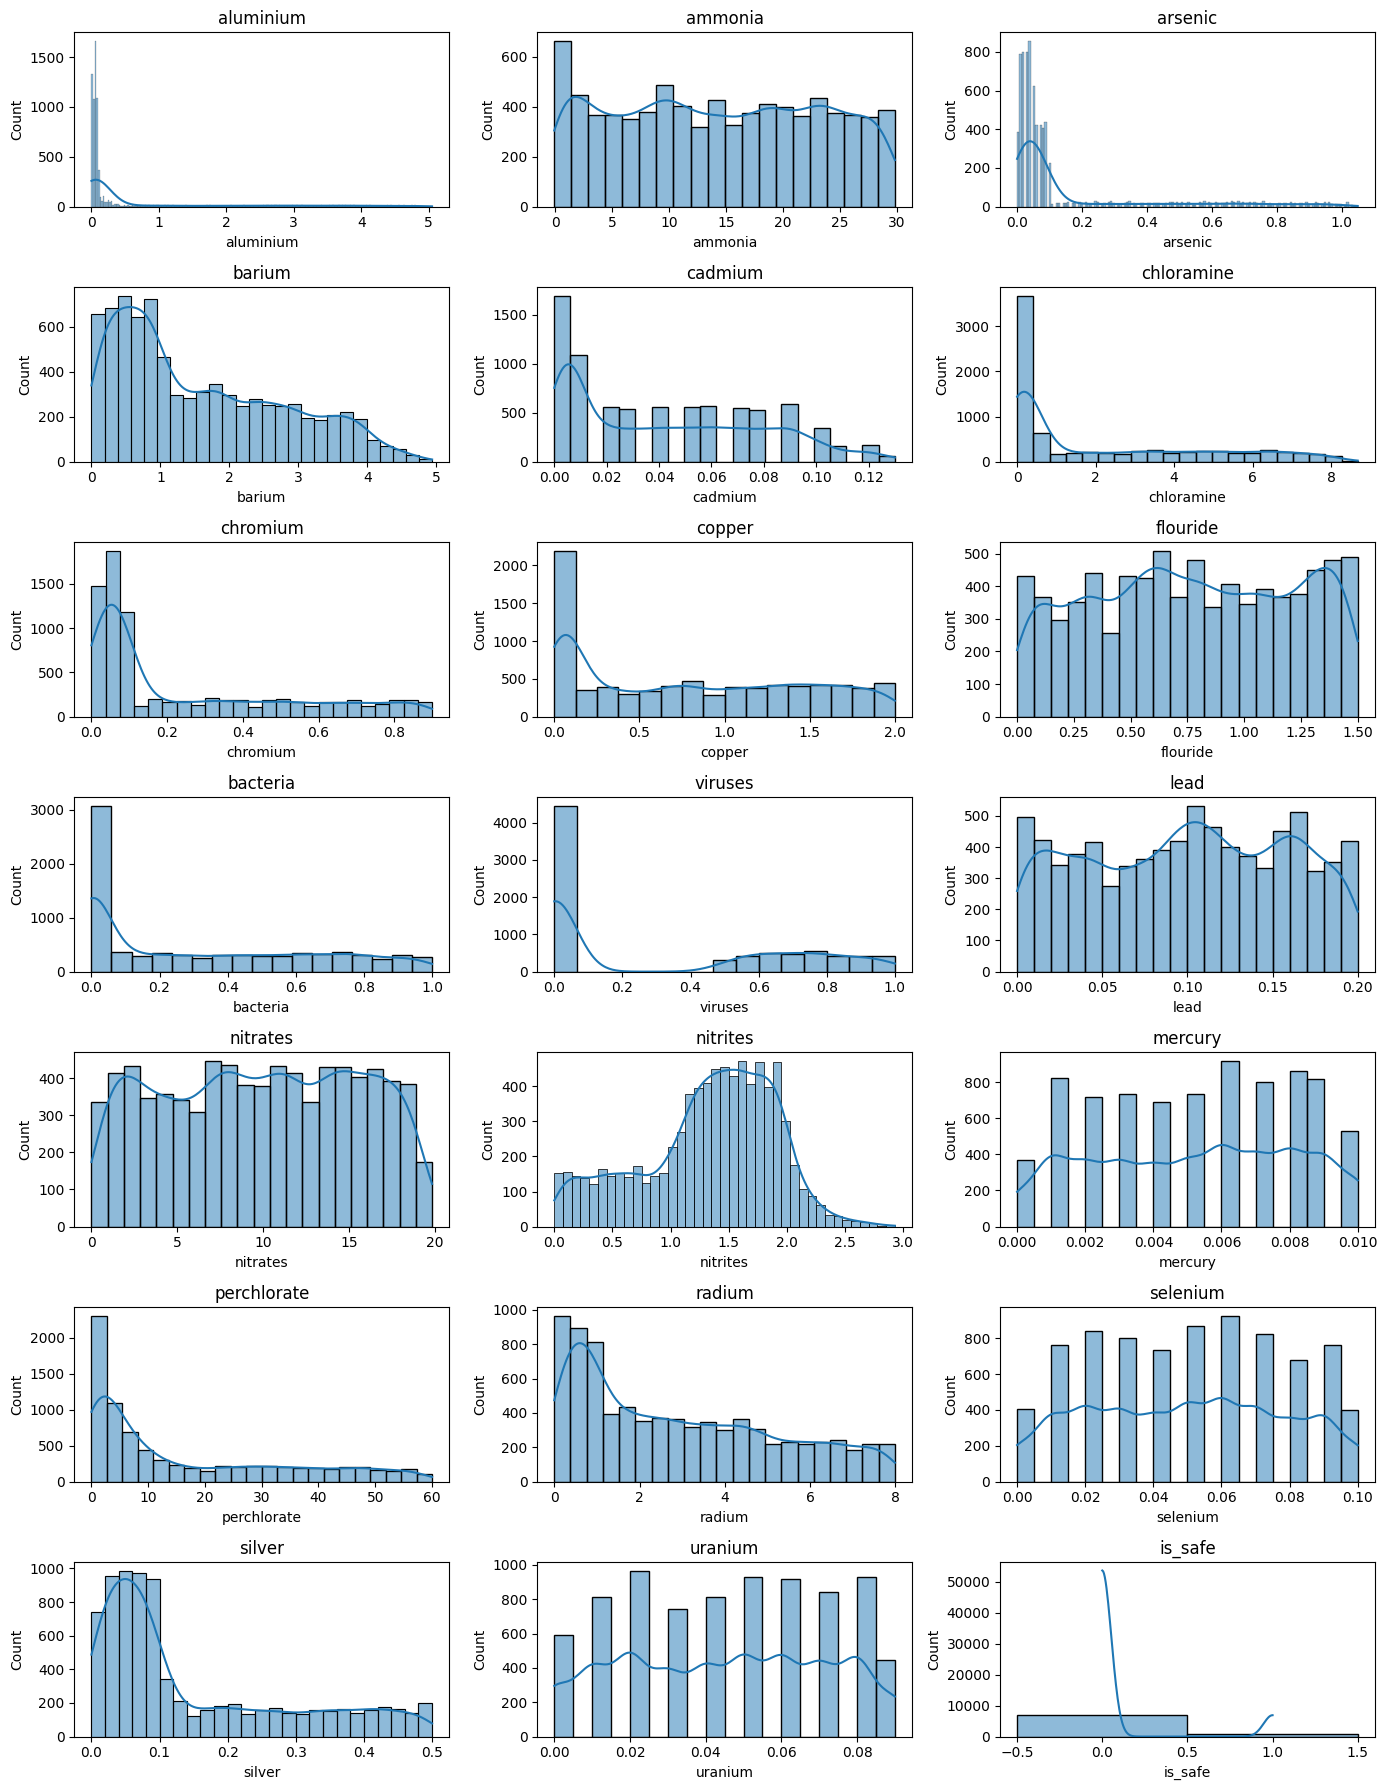

In [21]:
def plot_numeric_grid(df, cols, ncols=3, figsize=(15, 12)):
    n = len(cols)
    nrows = (n + ncols - 1) // ncols
    plt.figure(figsize=figsize)
    for i, col in enumerate(cols):
        plt.subplot(nrows, ncols, i+1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(col)
    plt.tight_layout()

plot_numeric_grid(df, df.columns, ncols=3, figsize=(14, 18))

### Проверка дубликатов

In [8]:
print(f"Количество дубликатов: {df.duplicated().sum()}")
print(f"Процент дубликатов: {(df.duplicated().sum() / len(df)) * 100:.2f}%")

Количество дубликатов: 0
Процент дубликатов: 0.00%


# Проверка корреляции

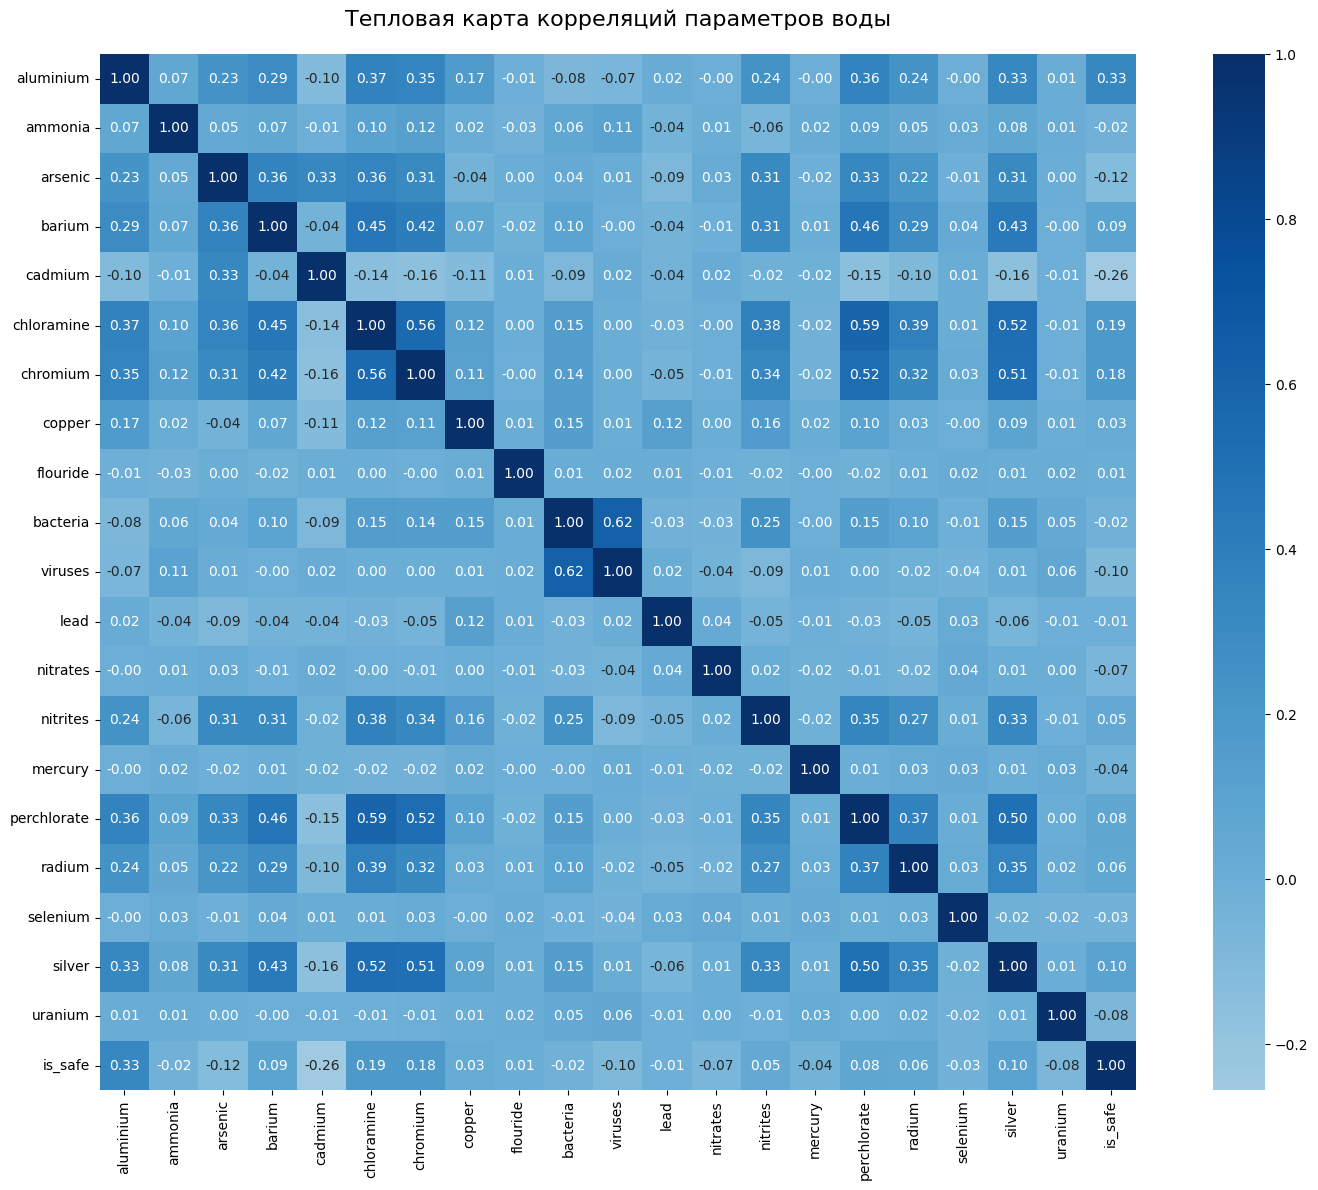

In [31]:
correlation_matrix = df.corr()

# Создаем тепловую карту
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, 
           annot=True,           # Показать числа в ячейках
           cmap='Blues',     # Цветовая схема
           center=0,            # Центр цветовой шкалы
           fmt='.2f',           # Формат чисел
           square=True)         # Квадратные ячейки

plt.title('Тепловая карта корреляций параметров воды', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

### Проверка дизбаланса целевой переменной

<Axes: xlabel='is_safe', ylabel='count'>

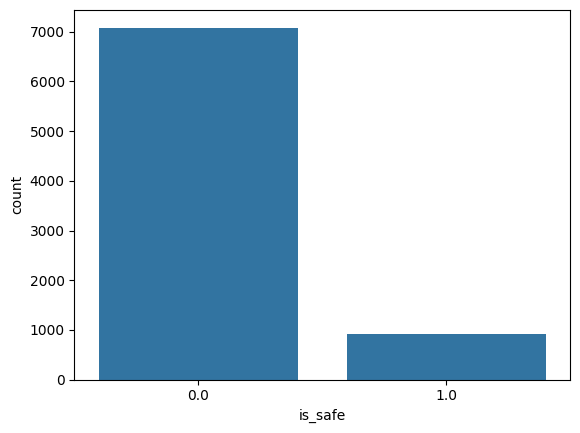

In [9]:
sns.countplot(data=df, x ='is_safe')

Перевес в сторону опасной воды понятен, потому что при оценке учитываются все 20 параметров. То есть если хотя бы 1 превысил норму, то вода опасна. Из-за этого количество опасной воды 